In [1]:
import pandas as pd

df = pd.read_csv("marketing_customer_analysis.csv")
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


#### 1. Show the dataframe shape.

In [2]:
df.shape

(10910, 26)

#### 2. Standardize header names.

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
print(df.columns)

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')


In [5]:
df = df.rename(columns = {'EmploymentStatus':'employment_status'})

In [6]:
n_cols = []
for i in range(len(df.columns)):
    n_cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = n_cols

print(df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


#### 3. Which columns are numerical?

In [7]:
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


#### 4. Which columns are categorical?

In [8]:
df.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


#### 5. Check and deal with `NaN` values.

In [9]:
df.isna().sum()

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [10]:
round(df.isna().sum()/len(df),4)*100 

customer                          0.00
state                             5.78
customer_lifetime_value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective_to_date                 0.00
employment_status                 0.00
gender                            0.00
income                            0.00
location_code                     0.00
marital_status                    0.00
monthly_premium_auto              0.00
months_since_last_claim           5.80
months_since_policy_inception     0.00
number_of_open_complaints         5.80
number_of_policies                0.00
policy_type                       0.00
policy                            0.00
renew_offer_type                  0.00
sales_channel                     0.00
total_claim_amount                0.00
vehicle_class                     5.70
vehicle_size                      5.70
vehicle_type                     50.25
dtype: float64

In [11]:
df = df.drop(columns = ['vehicle_type']) #too many NaN values
round(df.isna().sum() / len(df),4) * 100 

customer                         0.00
state                            5.78
customer_lifetime_value          0.00
response                         5.78
coverage                         0.00
education                        0.00
effective_to_date                0.00
employment_status                0.00
gender                           0.00
income                           0.00
location_code                    0.00
marital_status                   0.00
monthly_premium_auto             0.00
months_since_last_claim          5.80
months_since_policy_inception    0.00
number_of_open_complaints        5.80
number_of_policies               0.00
policy_type                      0.00
policy                           0.00
renew_offer_type                 0.00
sales_channel                    0.00
total_claim_amount               0.00
vehicle_class                    5.70
vehicle_size                     5.70
dtype: float64

In [12]:
#after
df.shape

(10910, 24)

In [13]:
df = df.dropna() #Drop the rows where at least one element is NaN

In [14]:
#before
df.shape

(9134, 24)

In [15]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [16]:
df = df.reset_index(drop=True)
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,82,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
9131,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


#### 6. Datetime format ####
- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the `first quarter , ie. January, February and March`. _Hint_: If data from March does not exist, consider only January and February.

In [17]:
df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize


In [18]:
#check data type format for 'effective_to_date'
type(df['effective_to_date'][0])

str

In [19]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

In [20]:
type(df['effective_to_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df['month'] = df['effective_to_date'].dt.month

In [22]:
df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2


In [23]:
df['month'].value_counts() 

1    4898
2    4236
Name: month, dtype: int64

In [24]:
first_quarter = df[df['month']<=3]
first_quarter

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [25]:
first_quarter['month'].value_counts()

1    4898
2    4236
Name: month, dtype: int64

#### 7.  BONUS: Put all the previously mentioned data transformations into a function.

In [26]:
def clean(df):
    
    n_cols = []
    for i in range(len(df.columns)):
        n_cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = n_cols
    
    df['month'] = df['effective_to_date'].dt.month
    
    return df[df['month']<=3]

In [27]:
clean(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


In [28]:
df['month'].value_counts()

1    4898
2    4236
Name: month, dtype: int64

# Round 3

#### Describe DataFrame

In [29]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [30]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [31]:
import numpy as np
df.describe(include=[np.object]).T

,count,unique,top,freq
customer,9134,9134,LM69036,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
employment_status,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298
policy_type,9134,3,Personal Auto,6788


#### Show a plot of the total number of responses.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Show a plot of the total number of responses.

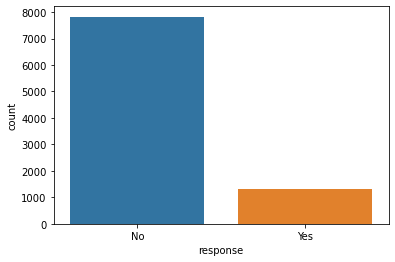

In [33]:
sns.countplot('response', data = df)
plt.show()

#### Show a plot of the response rate by the sales channel.

In [34]:
def fun (x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['response_rate'] = df['response'].apply(fun)
df.head(3)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2,0


In [35]:
type(df['response_rate'][0])

numpy.int64

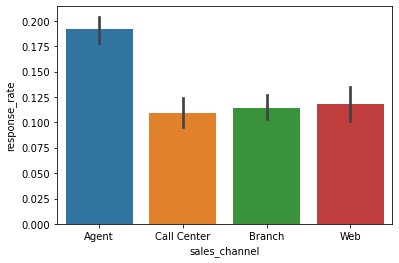

In [36]:
sns.barplot(x='sales_channel', y='response_rate', data = df)
plt.show()

#### Show a plot of the response rate by the total claim amount.

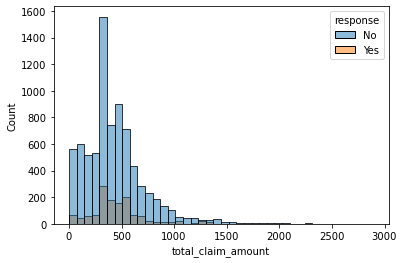

In [37]:
sns.histplot(x="total_claim_amount", hue="response", data=df, bins=40);

#### Show a plot of the response rate by income.

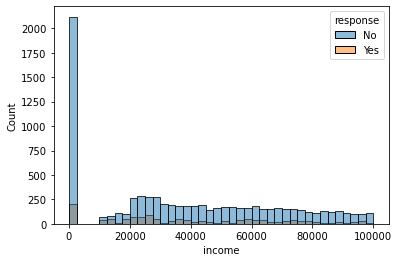

In [38]:
sns.histplot(x='income', hue='response',  data=df, bins=40)
plt.show()

# Round 5

#### X-y split.

In [39]:
from sklearn.preprocessing import MinMaxScaler

y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)

X_num = X.select_dtypes(include = np.number)


#### Normalize (numerical).

In [40]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(9134, 9)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,response_rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0
9130,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0
9131,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
9132,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0


# Round 6

### One Hot/Label Encoding (categorical).

In [41]:
X_cat = X.select_dtypes(include = np.object)

In [42]:
X_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize


In [43]:
X_cat = X_cat.drop(['customer'], axis=1)
X_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize


In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()


[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:

x_normalized = pd.DataFrame(x_normalized)
x_normalized

,0,1,2,3,4,5,6,7,8
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.0,0.0
9130,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,1.0,0.0
9131,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
9132,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0


In [46]:
onehot_encoded

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9131,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Concat DataFrames

In [47]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)

### Linear Regression

#### Train-test split.

In [48]:
X.shape

(9134, 52)

In [49]:
X.head()

,0,1,2,3,4,5,6,7,8,California,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 52)
(1827, 52)
(7307,)
(1827,)


In [52]:
X_train.head()

,0,1,2,3,4,5,6,7,8,California,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
5123,0.009354,0.000000,0.109705,0.114286,0.040404,0.6,0.000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7738,0.075385,0.000000,0.215190,0.200000,0.424242,0.0,1.000,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
214,0.044826,0.678109,0.033755,0.028571,0.787879,0.0,1.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8580,0.138773,0.000000,0.029536,0.542857,0.020202,0.6,0.125,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7857,0.071306,0.490973,0.151899,0.114286,0.464646,0.0,0.250,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
y_train.head()

5123    420.041981
7738    806.400000
214     331.200000
8580    326.400000
7857    698.400000
Name: total_claim_amount, dtype: float64

In [54]:
y_train.shape

(7307,)

#### Apply linear regression.

In [55]:
from sklearn import linear_model


lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Model Validation

In [56]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)


r2_train = r2_score(y_train, predictions)
print('train R2:',r2_train) # 0 ,     0,5 to 1 = good


train R2: 0.7718223351254845


In [57]:
predictions2 = lm.predict(X_test)

r2_test = r2_score(y_test, predictions2)
print('test R2:', r2_test)

test R2: 0.7734634637688903


In [58]:
from sklearn.metrics import mean_squared_error as mse #

train_mse = mse(lm.predict(X_train), y_train)
print('train MSE:', train_mse)

train MSE: 19080.434957293004


In [59]:
test_mse = mse(lm.predict(X_test), y_test)
print('test MSE:', test_mse)

test MSE: 19803.285770839797


In [60]:
from math import sqrt

train_rmse = sqrt(train_mse)
print('train RMSE', train_rmse)

train RMSE 138.13194763447376


In [61]:
test_rmse = sqrt(test_mse)
print('test RMSE', test_rmse)

test RMSE 140.72414778864285


In [62]:
from sklearn.metrics import mean_absolute_error as mae

train_mae = mae(lm.predict(X_train), y_train)
print('train MAE', train_mae)

train MAE 94.55776416221454


In [63]:
test_mae = mae(lm.predict(X_test), y_test)
print('test MAE', test_mae)

test MAE 96.7957702918902


#  Round 7  

### Modeling

Description:

- Try to improve the linear regression model.

In [64]:
X.head()

,0,1,2,3,4,5,6,7,8,California,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### I decaded to change from test_size=0.2 to test_size=0.8. let's see what comes out of it!

In [65]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1826, 52)
(7308, 52)
(1826,)
(7308,)


In [67]:
X_train.head()

,0,1,2,3,4,5,6,7,8,California,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
409,0.135146,0.866005,0.210970,0.942857,0.545455,0.4,0.125,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7532,0.094015,0.000000,0.358650,0.571429,0.141414,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9114,0.070172,0.902692,0.143460,0.028571,0.777778,0.0,0.750,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3461,0.043985,0.560156,0.029536,0.885714,0.303030,0.2,0.250,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
899,0.268331,0.000000,0.147679,0.828571,0.222222,0.8,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
y_train.head()

409      532.800000
7532    1051.200000
9114     122.924197
3461     326.400000
899      460.800000
Name: total_claim_amount, dtype: float64

In [69]:
lm2 = linear_model.LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [70]:
from sklearn.metrics import r2_score
predictions = lm2.predict(X_train)

r2_train = r2_score(y_train, predictions)  
print('train R2:',r2_train)

train R2: 0.7814400356554794


In [71]:
predictions2 = lm2.predict(X_test)

r2_test = r2_score(y_test, predictions2)  #test R2: 0.7734634637688903 when  test_size=0.2
print('test R2:', r2_test)

test R2: 0.7640035373026162


In [72]:
train_mse = mse(lm2.predict(X_train), y_train)
print('train MSE:', train_mse)

train MSE: 17948.411776974568


In [73]:
test_mse = mse(lm.predict(X_test), y_test) #test MSE: 19803.285770839797 when  test_size=0.2
print('test MSE:', test_mse)

test MSE: 19426.11529204644


In [74]:
train_rmse = sqrt(train_mse)
print('train RMSE', train_rmse)

train RMSE 133.9716827429385


In [75]:
test_rmse = sqrt(test_mse) #test RMSE 140.72414778864285 when  test_size=0.2
print('test RMSE', test_rmse)

test RMSE 139.37759967816365


In [76]:
train_mae = mae(lm.predict(X_train), y_train)
print('train MAE', train_mae)

train MAE 94.74139139869702


In [77]:
test_mae = mae(lm.predict(X_test), y_test) #test MAE 96.7957702918902 when  test_size=0.2
print('test MAE', test_mae)

test MAE 95.07138401239247


#### Result:   
Metrics got worse

####  What if we remove some unimportant columns for `'total_claim_amount'`?

In [80]:
y = df['total_claim_amount']
X2 = df.drop(['total_claim_amount'], axis=1)


In [81]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [82]:
X2.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month,response_rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,1,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize,2,0
5,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize,2,0
6,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,66839,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Medsize,1,1
7,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,70961,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Small,1,0
8,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Large,1,0
9,EO51920,Oregon,19955.257130,No,Extended,High School or Below,2011-01-31,Employed,F,69096,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize,1,0


In [84]:
X2 = df.drop(['customer', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'policy_type', 'vehicle_class', 'vehicle_size'], axis=1)
X2.head(3)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,month,response_rate
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,9,Corporate L3,Offer3,Agent,292.800000,2,0
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,1,Personal L3,Offer4,Call Center,744.924331,1,0
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,2,Personal L3,Offer3,Call Center,480.000000,2,0


In [ ]:
X2.info()

In [85]:
X2_num = X2.select_dtypes(include = np.number)

In [86]:
transformer = MinMaxScaler().fit(X2_num)
x_normalized = transformer.transform(X2_num)
print(x_normalized.shape)
#x_normalized
pd.DataFrame(x_normalized, columns=X2_num.columns)

(9134, 7)


,customer_lifetime_value,income,monthly_premium_auto,number_of_policies,total_claim_amount,month,response_rate
0,0.035752,0.480381,0.000000,1.000,0.101171,1.0,0.0
1,0.004059,0.000000,0.012658,0.000,0.257445,0.0,0.0
2,0.160264,0.221432,0.164557,0.125,0.165875,1.0,0.0
3,0.250953,0.490873,0.151899,0.125,0.167263,0.0,1.0
4,0.038525,0.374121,0.008439,0.375,0.099358,1.0,0.0
...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.000,0.122739,0.0,0.0
9130,0.212833,0.000000,0.531646,0.125,0.310217,1.0,0.0
9131,0.041281,0.611576,0.016878,0.625,0.094333,0.0,0.0
9132,0.270122,0.398446,0.590717,0.125,0.131763,1.0,0.0


In [87]:
X2_cat = X2.select_dtypes(include = np.object)
X2_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,sales_channel
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate L3,Offer3,Agent
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal L3,Offer4,Call Center
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal L3,Offer3,Call Center
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate L3,Offer2,Branch
4,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate L2,Offer2,Branch


In [88]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X2_cat)
print(encoder.categories_)
encoded = encoder.transform(X2_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object)]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]


,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Personal L3,Special L1,Special L2,Special L3,Offer2,Offer3,Offer4,Branch,Call Center,Web
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [89]:
x_normalized = pd.DataFrame(x_normalized)
x_normalized

,0,1,2,3,4,5,6
0,0.035752,0.480381,0.000000,1.000,0.101171,1.0,0.0
1,0.004059,0.000000,0.012658,0.000,0.257445,0.0,0.0
2,0.160264,0.221432,0.164557,0.125,0.165875,1.0,0.0
3,0.250953,0.490873,0.151899,0.125,0.167263,0.0,1.0
4,0.038525,0.374121,0.008439,0.375,0.099358,1.0,0.0
...,...,...,...,...,...,...,...
9129,0.010729,0.598664,0.054852,0.000,0.122739,0.0,0.0
9130,0.212833,0.000000,0.531646,0.125,0.310217,1.0,0.0
9131,0.041281,0.611576,0.016878,0.625,0.094333,0.0,0.0
9132,0.270122,0.398446,0.590717,0.125,0.131763,1.0,0.0


In [90]:
onehot_encoded

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Personal L3,Special L1,Special L2,Special L3,Offer2,Offer3,Offer4,Branch,Call Center,Web
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9132,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Concat DataFrames

In [91]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)

#### Train-test split.

In [92]:
X.shape

(9134, 41)

In [93]:
X.head()

,0,1,2,3,4,5,6,California,Nevada,Oregon,...,Personal L3,Special L1,Special L2,Special L3,Offer2,Offer3,Offer4,Branch,Call Center,Web
0,0.035752,0.480381,0.000000,1.000,0.101171,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.004059,0.000000,0.012658,0.000,0.257445,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.160264,0.221432,0.164557,0.125,0.165875,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.250953,0.490873,0.151899,0.125,0.167263,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.038525,0.374121,0.008439,0.375,0.099358,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 41)
(1827, 41)
(7307,)
(1827,)


In [96]:
X_train.head()

,0,1,2,3,4,5,6,California,Nevada,Oregon,...,Personal L3,Special L1,Special L2,Special L3,Offer2,Offer3,Offer4,Branch,Call Center,Web
5123,0.009354,0.000000,0.109705,0.000,0.145151,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7738,0.075385,0.000000,0.215190,1.000,0.278694,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
214,0.044826,0.678109,0.033755,1.000,0.114443,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8580,0.138773,0.000000,0.029536,0.125,0.112784,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7857,0.071306,0.490973,0.151899,0.250,0.241364,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [97]:
y_train.head()

5123    420.041981
7738    806.400000
214     331.200000
8580    326.400000
7857    698.400000
Name: total_claim_amount, dtype: float64

#### Apply linear regression.

In [98]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Validation

In [103]:
from sklearn.metrics import r2_score
predictions2 = lm.predict(X_test)

r2_test = r2_score(y_test, predictions2)
print('test R2:', r2_test)

test R2: 1.0


In [100]:
test_mse = mse(lm.predict(X_test), y_test)
print('test MSE:', test_mse)

test MSE: 6.8901641122388865e-25


In [101]:
test_rmse = sqrt(test_mse)
print('test RMSE', test_rmse)

test RMSE 8.300701242810084e-13


In [102]:
test_mae = mae(lm.predict(X_test), y_test)
print('test MAE', test_mae)

test MAE 6.543728643544069e-13


### Result:   
Now we have better result, `test R2: 1.0`. Of course, in real life, we are unlikely to be able to have such a result, but as part of an Ironhack training course, as an example, I assume that it is possible.